# Lab 2

### Task1
##### Variable engineering

*   Reading file using pandas
*   Checking shape of dataframe
*   Fixing the column headers
*   Replacing nan's
*   Datatype corrections
*   Categorical variables encoding (label encoding with and without sklearn)
*   Describing the dataset using info and describe method
*   Saving to csv
*   Continuos variables







In [ ]:
import pandas as pd
import numpy as np 
df = pd.read_csv('/content/crx.data', header=None)
display(df.head())
print("Shape of dataframe : ", df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


Shape of dataframe :  (690, 16)


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [ ]:
# Column Headers
df.columns = ["A"+str(s) for s in range(1,17)]
display(df.head())

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
# replaces ? with np.nan
df = df.replace('?', np.nan)

In [ ]:
for col in df.columns:
  print(col + " has " + str(df[col].nunique()) + " unqiue values")

A1 has 2 unqiue values
A2 has 349 unqiue values
A3 has 215 unqiue values
A4 has 3 unqiue values
A5 has 3 unqiue values
A6 has 14 unqiue values
A7 has 9 unqiue values
A8 has 132 unqiue values
A9 has 2 unqiue values
A10 has 2 unqiue values
A11 has 23 unqiue values
A12 has 2 unqiue values
A13 has 3 unqiue values
A14 has 170 unqiue values
A15 has 240 unqiue values
A16 has 2 unqiue values


In [ ]:
# correcting dtypes
display(df['A2'].dtypes)
df['A2'] = df['A2'].astype("float")
df['A14'] = df['A14'].astype("float")
display(df['A2'].dtypes)

dtype('float64')

dtype('float64')

In [ ]:
#label encoding A16
print(np.array(df['A16'][0:10]))
df['A16_le'] = df["A16"].map({'+':1,'-':0})
print(np.array(df['A16_le'])[0:10])

#label encoding using sklearn
import sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['A16'])
df['A16_le_sk'] = le.transform(df['A16'])
print("Classes detected : ", le.classes_)
print(np.array(df['A16_le_sk'])[0:10])

['+' '+' '+' '+' '+' '+' '+' '+' '+' '+']
[1 1 1 1 1 1 1 1 1 1]
Classes detected :  ['+' '-']
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1         678 non-null    object 
 1   A2         678 non-null    float64
 2   A3         690 non-null    float64
 3   A4         684 non-null    object 
 4   A5         684 non-null    object 
 5   A6         681 non-null    object 
 6   A7         681 non-null    object 
 7   A8         690 non-null    float64
 8   A9         690 non-null    object 
 9   A10        690 non-null    object 
 10  A11        690 non-null    int64  
 11  A12        690 non-null    object 
 12  A13        690 non-null    object 
 13  A14        677 non-null    float64
 14  A15        690 non-null    int64  
 15  A16        690 non-null    object 
 16  A16_le     690 non-null    int64  
 17  A16_le_sk  690 non-null    int64  
dtypes: float64(4), int64(4), object(10)
memory usage: 97.2+ KB


In [ ]:
df.describe()

,A2,A3,A8,A11,A14,A15,A16_le,A16_le_sk
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928,0.555072
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598,0.497318,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000,1.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000,1.000000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000,1.000000


In [ ]:
df.to_csv('/content/new_crx.csv')

In [ ]:
# for c in df.columns:
#   if df[c].dtypes=="object" :
#     print(c)

cat_cols = [c for c in df.columns if df[c].dtypes=="object"]
display(df[cat_cols].head())
df[cat_cols] = df[cat_cols].fillna("0")

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+


In [ ]:
# finding the numeical columns
print([c for c in df.columns if df[c].dtypes!="object"])
# problem with above approach is tht datetime will also be a part of these hence the below solution is to resolve this problem
print([c for c in df.columns if df[c].dtypes=="float" or df[c].dtypes=="int"])
# to get continuos variables int or float and since categorical features can also be included the number of unique values must be greater than a certain threshold
cont_vars = [c for c in df.columns if ((df[c].dtypes=="float" or df[c].dtypes=="int") and df[c].nunique()>10)]
df[cont_vars]

['A2', 'A3', 'A8', 'A11', 'A15', 'A16_le', 'A16_le_sk']
['A2', 'A3', 'A8', 'A11', 'A15', 'A16_le', 'A16_le_sk']


,A2,A3,A8,A11,A15
0,30.83,0.000,1.25,1,0
1,58.67,4.460,3.04,6,560
2,24.50,0.500,1.50,0,824
3,27.83,1.540,3.75,5,3
4,20.17,5.625,1.71,0,0
...,...,...,...,...,...
685,21.08,10.085,1.25,0,0
686,22.67,0.750,2.00,2,394
687,25.25,13.500,2.00,1,1
688,17.92,0.205,0.04,0,750


### Task 2

*    Reading csv file
*    Number of unique values in the column
*    Number of rows of the particular value in the column
*    Converting to datetime values
*    Extrating datetime features
*    Grouping by value
*    Plotting graphs using matplotlib

In [ ]:
loan_df = pd.read_csv('/content/loan.csv')
display(loan_df.head())

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [ ]:
for col in loan_df.columns:
  print(col + " has " + str(loan_df[col].nunique()) + " number of unqiue values")

customer_id has 10000 number of unqiue values
disbursed_amount has 2522 number of unqiue values
interest has 1869 number of unqiue values
market has 5 number of unqiue values
employment has 11 number of unqiue values
time_employed has 2 number of unqiue values
householder has 3 number of unqiue values
income has 2891 number of unqiue values
date_issued has 1642 number of unqiue values
target has 2 number of unqiue values
loan_purpose has 8 number of unqiue values
number_open_accounts has 45 number of unqiue values
date_last_payment has 1071 number of unqiue values
number_credit_lines_12 has 7 number of unqiue values


In [ ]:
print("Unique values in the housholders columns : ", loan_df['householder'].unique())
print("Number of rows in each unique value : \n", loan_df['householder'].value_counts())

Unique values in the housholders columns :  ['RENT' 'OWNER' 'MORTGAGE']
Number of rows in each unique value : 
 MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64


In [ ]:
print(loan_df['date_issued'].dtypes)
loan_df['date_issued'] = pd.to_datetime(loan_df['date_issued'])
print(loan_df['date_issued'].dtypes)

object
datetime64[ns]


In [ ]:
import datetime as dt
loan_df['date_issued_month'] = loan_df['date_issued'].dt.month
loan_df['date_issued_year'] = loan_df['date_issued'].dt.year
loan_df['date_issued_day'] = loan_df['date_issued'].dt.day
loan_df['date_issued_dow'] = loan_df['date_issued'].dt.weekday

In [ ]:
loan_df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued_month,date_issued_year,date_issued_day,date_issued_dow
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,6,2013,11,1
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,5,2014,8,3
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,10,2013,26,5
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,8,2015,20,3
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,7,2014,22,1


<BarContainer object of 3 artists>

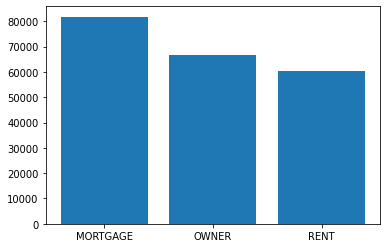

In [ ]:
import matplotlib.pyplot as plt
# plt.boxplot(loan_df["householder"], loan_df['interest'])
z = loan_df.groupby(['householder'],as_index=False)['income'].mean()
plt.bar(z['householder'], z['income'])

In [ ]:
catcols = [c for c in loan_df.columns if loan_df[c].dtype=='O']

In [ ]:
print("Number of columns with ccategorical features are :", len(catcols))
print(catcols)

Number of columns with ccategorical features are : 7
['market', 'employment', 'time_employed', 'householder', 'date_issued', 'loan_purpose', 'date_last_payment']


***Although the detected columns are object datatypes the date_last_payment date_issued column which is a datetime column is also placed along wihth this***

***To fix this we will try and convert it into datetime feature***

``
df['datetimecol'] = pd.to_datetime(df['datetimecol'])
``



In [ ]:
loan_df['date_last_payment'] = pd.to_datetime(loan_df['date_last_payment'])
loan_df['date_issued'] = pd.to_datetime(loan_df['date_issued'])
catcols = [c for c in loan_df.columns if loan_df[c].dtype=='O']
print("Number of columns with ccategorical features are :", len(catcols))
print(catcols)

Number of columns with ccategorical features are : 5
['market', 'employment', 'time_employed', 'householder', 'loan_purpose']
